In [1]:
import numpy as np 

#Função para extrair a matriz triangular superior equivalente
def triangularueq(A):
  A = A.copy()
  rows, cols = A.shape
  for j in range(rows):
    for i in range(j, cols-1):
      A[i+1] -= ((A[i+1, j] / A[j,j]) * A[j])

  return A

#Função para resolver matriz trianguladas superiormente
def restrianu(Atru, b):
  c = 0
  x = np.zeros(b.shape)
  x[-1] = b[-1] / Atru[-1,-1]
  for j, l in enumerate(Atru[-2::-1]):
    k = -(j+2)
    x[k] = (b[k] - (l @ x))/l[k]

  return x.flatten()

#Função para resolver matriz trianguladas inferiormente
def restrianl(Atrl, b):
  c = 0
  x = np.zeros(b.shape)
  x[0] = b[0]/Atrl[0,0]
  for j, l in enumerate(Atrl[1::]):
    k = j+1
    x[k] = (b[k] - (l @ x))/l[k]

  return x[::-1].flatten()

#Função para o Método de ELiminação de Gauss
def elimgauss(A, b):
  ab = np.c_[A, b]
  rows, cols = ab.shape
  for j in range(rows):
    for i in range(j, cols-2):
      ab[i+1] -= ((ab[i+1, j] / ab[j,j]) * ab[j])

  c = 0
  x = np.zeros(b.shape)
  Atr = ab[:, :-1]
  b = ab[:, -1]
  x[-1] = b[-1] / Atr[-1,-1]
  for j, l in enumerate(Atr[-2::-1]):
    k = -(j+2)
    x[k] = (b[k] - (l @ x))/l[k]

  return np.round(x.flatten(),4)

#Função para resolver um sistema linear utilizando a Fatoração LU
def fatoracaolu(A, b):
  
  Au = A.copy()
  rows, cols = Au.shape
  for j in range(rows):
    for i in range(j, cols-1):
      n = Au[i+1, j] / Au[j,j]
      Au[i+1] -= ((Au[i+1, j] / Au[j,j]) * Au[j])
      Ainf = np.eye(Au.shape[0])
      Ainf[i+1, j] = n

  Asup = Au

  c = 0
  y = np.zeros(b.shape)
  y[0] = b[0]/Ainf[0,0]
  for j, l in enumerate(Ainf[1::]):
    k = j+1
    y[k] = (b[k] - (l @ y))/l[k]

  c = 0
  x = np.zeros(b.shape)
  x[-1] = y[-1] / Asup[-1,-1]
  for j, l in enumerate(Asup[-2::-1]):
    k = -(j+2)
    x[k] = (y[k] - (l @ x))/l[k]

  return np.round(x.flatten(), 4)

**Exemplo para testar a função da matriz triangular superior equivalente!**

In [2]:
A = np.array([[2, 1, 4.0], [3, 4 ,4], [1, 2, 3]])
print(A)
print('-'*20)
Atr = triangularueq(A)
print('Fatoração U:')
print(Atr)

[[2. 1. 4.]
 [3. 4. 4.]
 [1. 2. 3.]]
--------------------
Fatoração U:
[[ 2.   1.   4. ]
 [ 0.   2.5 -2. ]
 [ 0.   0.   2.2]]


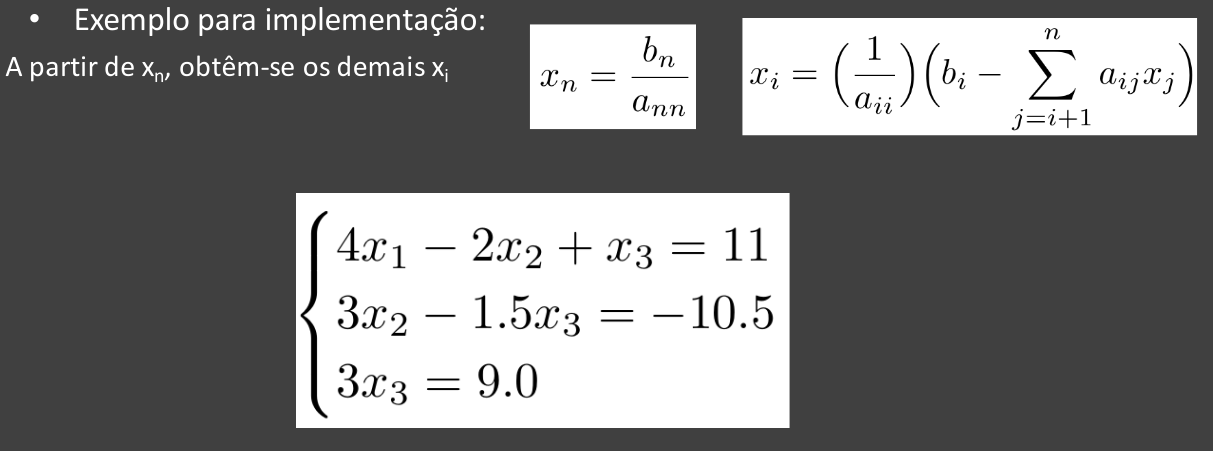

**Resolução do sistema linear triangulado acima, utilizando o método triangular superior!**

In [3]:
Atr = np.array([[4, -2, 1], [0, 3, -1.5], [0, 0, 3]])
b = np.array([[11],[-10.5],[9]])
x = restrianu(Atr, b)
print('Os valores de x que resolvem o sistema linear acima são', x)

Os valores de x que resolvem o sistema linear acima são [ 1. -2.  3.]


**Resolução do sistema linear triangulado acima, utilizando o método triangular inferior!**

In [4]:
Atr = np.array([[3, 0, 0], [-1.5, 3, 0], [1, -2, 4]])
b = np.array([[9],[-10.5],[11]])
x = restrianl(Atr, b)
print('Os valores de x que resolvem o sistema linear acima são', x)

Os valores de x que resolvem o sistema linear acima são [ 1. -2.  3.]


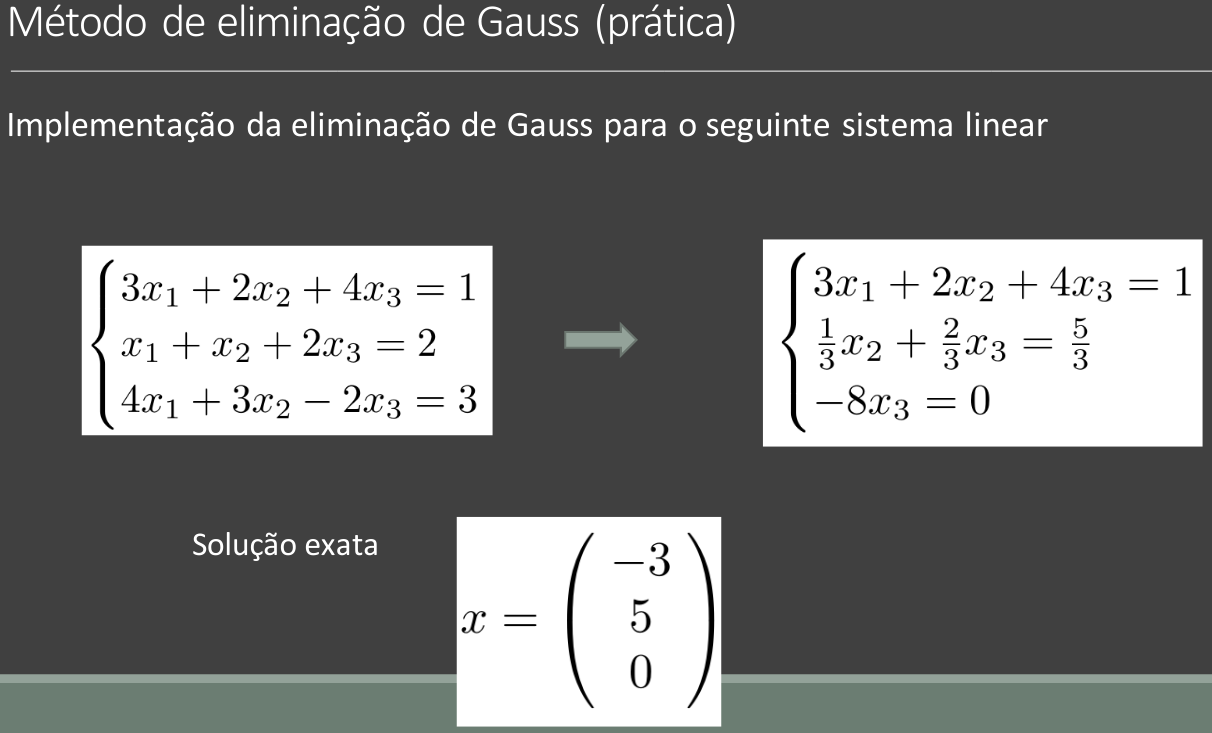

**Resolução do sistema linear acima, utilizando o Método de Eliminação de Gauss!**

In [5]:
A = np.array([[3, 2, 4.0], [1, 1 ,2], [4, 3, -2]])
b = np.array([[1],[2],[3]])

x = elimgauss(A, b)
print('Os valores de x que resolvem o sistema linear acima são', x)

Os valores de x que resolvem o sistema linear acima são [-3.  5.  0.]


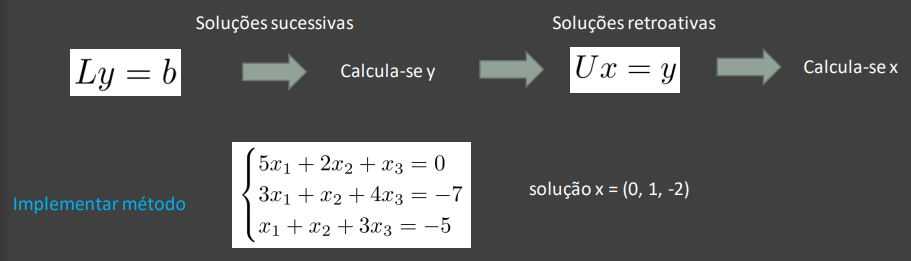

**Resolução do sistema linear acima, utilizando o Método da Fatoração LU!**

In [6]:
A = np.array([[5, 2.0, 1],
     [3, 1, 4],
     [1, 1, 3]])
b = np.array([[0],[-7.0],[-5]])

x = fatoracaolu(A, b)
print('Os valores de x que resolvem o sistema linear acima são', x)

Os valores de x que resolvem o sistema linear acima são [ 0.  1. -2.]
